Copyright **`(c)`** 2023 Giovanni Squillero `<giovanni.squillero@polito.it>`  
[`https://github.com/squillero/computational-intelligence`](https://github.com/squillero/computational-intelligence)  
Free for personal or classroom use; see [`LICENSE.md`](https://github.com/squillero/computational-intelligence/blob/master/LICENSE.md) for details.  

# LAB10

Use reinforcement learning to devise a tic-tac-toe player.

### Deadlines:

* Submission: Sunday, December 17 ([CET](https://www.timeanddate.com/time/zones/cet))
* Reviews: Dies Natalis Solis Invicti ([CET](https://en.wikipedia.org/wiki/Sol_Invictus))

Notes:

* Reviews will be assigned  on Monday, December 4
* You need to commit in order to be selected as a reviewer (ie. better to commit an empty work than not to commit)

Q-Learning usando il magic square a somma 15
MONTECARLO Approach

In [1]:
from itertools import combinations
from collections import namedtuple, defaultdict
from random import choice
from copy import deepcopy

from tqdm.auto import tqdm
import numpy as np
import logging
from matplotlib import pyplot as plt


c:\Users\Lorenzo Ugoccioni\Documents\PoliTo\LM - II anno\Computational Intelligence\Coding\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [31]:
EXP_RATE = 0.3
NUM_OF_ROUNDS = 1000
NUM_OF_MATCHES = 100
MAGIC = [2, 7, 6,
         9, 5, 1,
         4, 3, 8]

In [2]:
State = namedtuple('State', ['x', 'o'])

In [4]:
def print_board(pos: State):
    """Nicely prints the board"""
    for r in range(3):
        for c in range(3):
            index = r*3 + c
            if MAGIC[index] in pos.x:
                print('X', end='')
            elif MAGIC[index] in pos.o:
                print('O', end='')
            else:
                print('.', end='')
        print()
    print()

In [5]:
def win(elements):
    """Checks if elements is winning"""
    return any(sum(c)==15 for c in combinations(elements, 3))

def state_value(pos: State):
    """Evaluate state: +1 first player wins"""
    if win(pos.x):
        return 1
    elif win(pos.o):
        return -1
    else:
        return 0

In [36]:
def random_game(turn):
    trajectory = list()
    state = State(set(), set())
    available = set(range(1, 9+1))
    while available:
        if turn == 0:
            x = choice(list(available))
            state.x.add(x)
            trajectory.append(deepcopy(state))
            available.remove(x)
            if win(state.x) or not available:
                break
            turn = 1
        else:
            o = choice(list(available))
            state.o.add(o)
            trajectory.append(deepcopy(state))
            available.remove(o)
            if win(state.o):
                break
            turn = 0

    return trajectory


In [37]:
value_dictionary = defaultdict(float)
hit_state = defaultdict(int)
epsilon = .001

for steps in tqdm(range(100_000)):
    turn = choice([0,1])
    trajectory = random_game(turn)
    final_reward = state_value(trajectory[-1])
    for state in trajectory:
        hashable_state = (frozenset(state.x), frozenset(state.o))
        hit_state[hashable_state] += 1
        value_dictionary[hashable_state] = value_dictionary[hashable_state] + epsilon*(final_reward - value_dictionary[hashable_state])

100%|██████████| 100000/100000 [00:19<00:00, 5193.11it/s]


In [ ]:
sorted(value_dictionary.items(), key=lambda e: e[1], reverse=True)[:10]

In [40]:
def chooseAction(available_positions, actual_state, dictionary):
    if np.random.uniform(0, 1) <= EXP_RATE:
        # take random action
        action = choice(list(available_positions))   
    else:
        value_max = -999
        for p in available_positions:

            next_state = deepcopy(actual_state)
            next_state.x.add(p)
            hashable_state = (frozenset(next_state.x), frozenset(next_state.o))
            
            value = 0 if dictionary.get(hashable_state) is None else dictionary.get(hashable_state)
            if value >= value_max:
                value_max = value
                action = p
    #print("{} takes action {}".format("x", action))
    return action

In [41]:
def play(dictionary, turn):
    trajectory = list()
    state = State(set(), set())
    available = set(range(1, 9+1))
    while available:
        if turn==0:
            x = chooseAction(available, state, dictionary)
            state.x.add(x)
            trajectory.append(deepcopy(state))
            available.remove(x)
            if win(state.x) or not available:
                break
            turn = 1
        else:
            o = choice(list(available))
            state.o.add(o)
            trajectory.append(deepcopy(state))
            available.remove(o)
            if win(state.o):
                break
            turn = 0
    return trajectory

74 %
Win:74
Stall:22
Lose:4
Not lose %: 96.0 %


80 %
Win:80
Stall:16
Lose:4
Not lose %: 96.0 %


75 %
Win:75
Stall:23
Lose:2
Not lose %: 98.0 %


80 %
Win:80
Stall:16
Lose:4
Not lose %: 96.0 %


70 %
Win:70
Stall:29
Lose:1
Not lose %: 99.0 %


80 %
Win:80
Stall:19
Lose:1
Not lose %: 99.0 %


81 %
Win:81
Stall:18
Lose:1
Not lose %: 99.0 %


72 %
Win:72
Stall:26
Lose:2
Not lose %: 98.0 %


74 %
Win:74
Stall:22
Lose:4
Not lose %: 96.0 %


82 %
Win:82
Stall:16
Lose:2
Not lose %: 98.0 %


77 %
Win:77
Stall:18
Lose:5
Not lose %: 95.0 %


72 %
Win:72
Stall:27
Lose:1
Not lose %: 99.0 %


86 %
Win:86
Stall:13
Lose:1
Not lose %: 99.0 %


71 %
Win:71
Stall:27
Lose:2
Not lose %: 98.0 %


77 %
Win:77
Stall:21
Lose:2
Not lose %: 98.0 %


88 %
Win:88
Stall:12
Lose:0
Not lose %: 100.0 %


77 %
Win:77
Stall:17
Lose:6
Not lose %: 94.0 %


83 %
Win:83
Stall:15
Lose:2
Not lose %: 98.0 %


76 %
Win:76
Stall:22
Lose:2
Not lose %: 98.0 %


78 %
Win:78
Stall:21
Lose:1
Not lose %: 99.0 %


79 %
Win:79
Stall:1

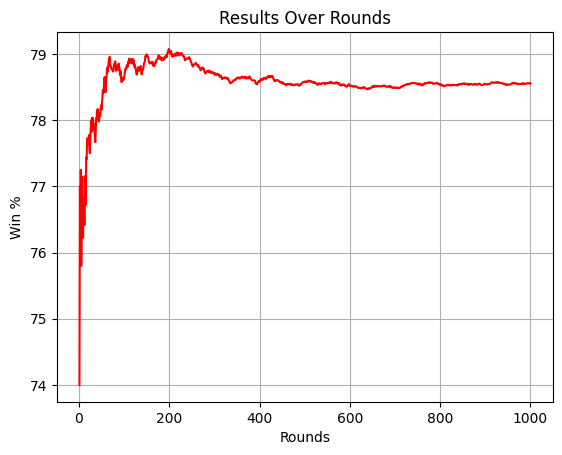

In [43]:
logging.getLogger().setLevel(logging.INFO)

history = []
for round in range(NUM_OF_ROUNDS):
    result = [0, 0, 0]          # --> [WINNING, STALL, LOSING]
    n_win=0
    for match in range(NUM_OF_MATCHES):
        turn = choice([0,1])
        winner = state_value(play(value_dictionary, turn)[-1])
        
        if winner==1:
            result[0] += 1
            n_win += 1
        elif winner==0:
            result[1] += 1
        elif winner==-1:
            result[2] += 1
    
    history.append(n_win)
    print(f"{n_win} %")
    print(f"Win:{result[0]}\nStall:{result[1]}\nLose:{result[2]}\nNot lose %: {(result[0]+result[1])/(result[0]+result[1]+result[2])*100} %\n\n")

history = np.array(history)
avg_at_every_round = np.cumsum(history) / (np.arange(len(history)) + 1)
generations = range(1, 1000 + 1)

plt.plot(generations, avg_at_every_round, linestyle='-', color='r')
plt.title('Results Over Rounds')
plt.xlabel('Rounds')
plt.ylabel('Win %')
plt.grid(True)
plt.show()